# kmeans
Investigate the clusters of the clustering algorithm

In [ ]:
import warnings
import os
import sys

PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), "../../..")) # Determine the project's root directory
sys.path.append(PROJECT_ROOT) # Add the project root directory to Python's module search path.



from src.classification.clustering.clustering_algorithms import kmeans_clustering
from src.config_loader import *
from src.classification.database_communication.DatabaseCommunication import DatabaseCommunication
from plotting.plot_networks import *
from plotting.plotting_classification import plot_percentage_of_clusters, \
    plot_stacked_distribution_of_clusters_per_regio_5, plot_bar_distribution_of_clusters_per_regio_5

warnings.filterwarnings('ignore')

In [2]:
dc = DatabaseCommunication()
df_parameters_of_grids = dc.municipal_register_with_clustering_parameters_for_classification_version()

Database connection is constructed. 


In [3]:
df_parameters_of_grids, representative_networks = kmeans_clustering(df_parameters_of_grids=df_parameters_of_grids,
                                                                    list_of_clustering_parameters=LIST_OF_CLUSTERING_PARAMETERS,
                                                                    n_clusters=N_CLUSTERS_KMEANS)

plot percentage of clusters

In [ ]:
plot_percentage_of_clusters(df_plz_parameters=df_parameters_of_grids)

stacked bar plot of distribution of clusters over regio 5

In [ ]:
plot_stacked_distribution_of_clusters_per_regio_5(df_plz_parameters=df_parameters_of_grids)

bar plot of clusters in regio 5 classes side by side

In [ ]:
plot_bar_distribution_of_clusters_per_regio_5(df_plz_parameters=df_parameters_of_grids)

plot clusters over cluster parameters

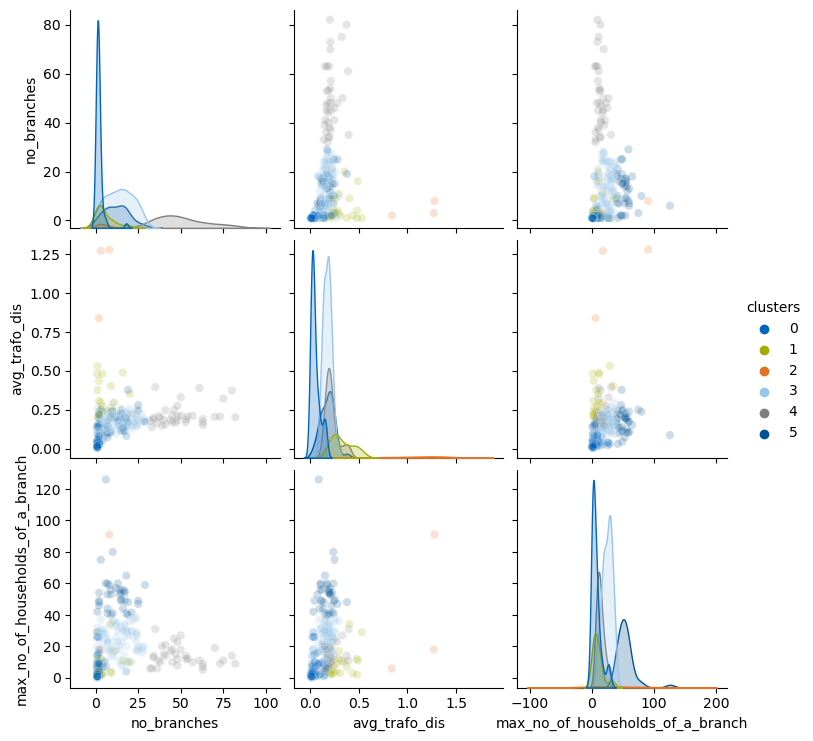

In [8]:
df_pairplot = df_parameters_of_grids[[param1, param2, param3, 'clusters']]
sns.pairplot(data=df_pairplot, hue='clusters', palette=TUMPalette, kind='scatter', plot_kws={'alpha': 0.2})
# plt.savefig('pairplot.pdf', dpi=600, bbox_inches='tight')